# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.tail()

C:\Users\GG\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool

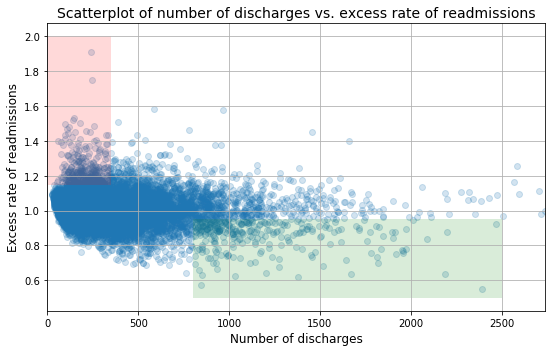

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A). Do you agree with the above analysis and recommendations? Why or why not?

The above analyis  is based on a single scatter plot and does not convey a clear relationship between excess readmissions and the hospital capacity (number of discharges). The trend is not very clear. 

The statistical analysis for discharges < 100 and for discharges >1000 is correct.
The conclusion that smaller hospitals are lacking resources and therefore not able to reduce readmission rates is not statistically known or we do not have information about that conclusion.


B.) Provide support for your arguments and your own recommendations with a statistically sound analysis:
1.) Setup an appropriate hypothesis test.

Null Hypothesis (H0): There is no significant correlation between hospital readmissions and number of discharges(hopsital capacity)

Alternate Hypothesis (Ha): There is significant correlation between excess readmissions and hosptal capacity (number of discharges)

In [5]:
# Clearing entries with missing values
clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]

In [6]:
#check data for missing values 
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [7]:
#summary statistics 
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [8]:
#correlation matrix
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [9]:
#correlation between number of discharges and excess readmission ratio
r1 = -0.097398
r_square = r1**2
print('correlation:', r1)
print ('r-square:', r_square)

correlation: -0.097398
r-square: 0.009486370404


The r-square is very small. There is a very small correlation between number of discharges and excess readmission

2.) Compute and report the observed significance value (or p-value).

In [10]:
# calculate P-value
# number of samples
n1= clean_hospital_read_df['Number of Discharges'].count()
print('number of samples:', n1)
# calculate t statistic
t1 =(r1*((n1-2)/(1-r1**2))**0.5)
print('t-statistic', t1)

import scipy.stats as stats
p_value = stats.t.sf(np.abs(t1), n1-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('P_value:', p_value)

number of samples: 11497
t-statistic -10.492386957113085
P_value: 1.22244044585744e-25


3.) Report statistical significance for α = .01 

The p-value is very small and much less than alpha =0.01. Therefore, we can reject the null hypothesis accept the alternate hypothesis (H1) that there is a correlation between hospital readmissions and number of discharges.

4.) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

There is statistical significance in data correlation with r-square ~=0.01, which explains that there is about 1% of the readmissions can be attributed to number of discharges. 

For practical purposes, it is a very small correlation to expalin the significance. There might be other factors affecting the readmissions such as, there may not be hosptals in the vicinity that caters to medical emergiences. Therefore, more studies need to be done before making a conclusion on the recommendation to make changes to the hopsitals.
          

5.) Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?

Scatter plot is a good way to show the trend. Here it is supposed to convey the message that with increase in the number of discharges, the readmission ratio should trend downwards. Adding a trend line will also help.

Construct another plot that conveys the same information in a more direct manner.
Please see the plot below. The discharge data is split into three groups and color coded. Also, the x axis is plotted using log scale for better visualization. This plot clearly shows trend: decrease in number of discharges increases the readmission ratio.

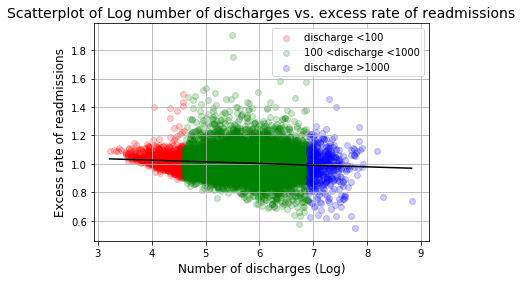

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
import seaborn as sns
# Seperating the hospitals by number of discharges
low = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

high = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

med = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 1000) &
                             (clean_hospital_read_df['Number of Discharges'] > 100)]

x_low, y_low = np.log(low['Number of Discharges']), low['Excess Readmission Ratio']
x_med, y_med = np.log(med['Number of Discharges']), med['Excess Readmission Ratio']
x_high, y_high = np.log(high['Number of Discharges']), high['Excess Readmission Ratio']


plt.scatter(x_low, y_low,alpha=0.2, color='red', label='discharge <100')
plt.scatter(x_med, y_med,alpha=0.2, color='green', label ='100 <discharge <1000')
plt.scatter(x_high, y_high,alpha=0.2, color='blue', label ='discharge >1000')

plt.xlabel('Number of discharges (Log)', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of Log number of discharges vs. excess rate of readmissions', fontsize=14)
plt.legend()

# add trend line
x_trend, y_trend = np.log(clean_hospital_read_df['Number of Discharges']), clean_hospital_read_df['Excess Readmission Ratio']
z = np.polyfit(x_trend, y_trend, 1)
p = np.poly1d(z)
plt.plot(x_trend,p(x_trend),"black")



plt.grid(True)
plt.show()

